In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore



import torch
print(torch.__version__)
print(torch.cuda.is_available())  # will be False on Mac, that's fine


2.9.1
False


## CLEANING THE DATA

In [66]:
ogDF = pd.read_csv("./MainDataset.csv")

mainDF = ogDF.copy()

print(mainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Painter              2500 non-null   object
 1   Subject of Painting          2500 non-null   object
 2   Style                        2500 non-null   object
 3   Medium                       2500 non-null   object
 4   Size                         2500 non-null   object
 5   Frame                        2500 non-null   object
 6   Location                     2500 non-null   object
 7   Price ($)                    2500 non-null   int64 
 8   Delivery (days)              2500 non-null   int64 
 9   Shipment                     2500 non-null   object
 10  Color Palette                2500 non-null   object
 11  Copy or Original             2500 non-null   object
 12  Print or Real                2500 non-null   object
 13  Recommended Environment      2500

In [67]:
print(mainDF.columns.tolist())


['Name of Painter', 'Subject of Painting', 'Style', 'Medium', 'Size', 'Frame', 'Location', 'Price ($)', 'Delivery (days)', 'Shipment', 'Color Palette', 'Copy or Original', 'Print or Real', 'Recommended Environment', 'Mood/Atmosphere', 'Theme/Lighting Requirements', 'Reproduction Type', 'Target Audience']


In [68]:
# Strip whitespace from categorical columns
cat_cols = mainDF.select_dtypes('object').columns
mainDF[cat_cols] = mainDF[cat_cols].apply(lambda col: col.str.strip())

print(mainDF.head())


  Name of Painter Subject of Painting                   Style      Medium  \
0            Noah            Seascape  Abstract Expressionism  Watercolor   
1         Vincent            Abstract  Abstract Expressionism    Charcoal   
2             Ava          Still Life                  Modern  Watercolor   
3            Liam            Wildlife                  Cubism     Acrylic   
4          Olivia           Landscape  Abstract Expressionism    Charcoal   

      Size Frame Location  Price ($)  Delivery (days)       Shipment  \
0  20"x30"   Yes  Chicago        459                6  Free Shipping   
1  20"x30"    No    Miami        657                6  Free Shipping   
2  18"x24"    No    Miami        907                7       Standard   
3  18"x24"    No  Calgary        649                3       Standard   
4  30"x40"   Yes    Miami        539                5  Free Shipping   

   Color Palette Copy or Original Print or Real Recommended Environment  \
0  Neutral Tones         Orig

In [69]:
mainDF['Reproduction Type'] = mainDF['Reproduction Type'].fillna('Unknown')

print(mainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Painter              2500 non-null   object
 1   Subject of Painting          2500 non-null   object
 2   Style                        2500 non-null   object
 3   Medium                       2500 non-null   object
 4   Size                         2500 non-null   object
 5   Frame                        2500 non-null   object
 6   Location                     2500 non-null   object
 7   Price ($)                    2500 non-null   int64 
 8   Delivery (days)              2500 non-null   int64 
 9   Shipment                     2500 non-null   object
 10  Color Palette                2500 non-null   object
 11  Copy or Original             2500 non-null   object
 12  Print or Real                2500 non-null   object
 13  Recommended Environment      2500

In [70]:
# change price column name
mainDF = mainDF.rename(columns={'Price ($)': 'Price', 'Delivery (days)': 'Delivery'})
print(mainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Painter              2500 non-null   object
 1   Subject of Painting          2500 non-null   object
 2   Style                        2500 non-null   object
 3   Medium                       2500 non-null   object
 4   Size                         2500 non-null   object
 5   Frame                        2500 non-null   object
 6   Location                     2500 non-null   object
 7   Price                        2500 non-null   int64 
 8   Delivery                     2500 non-null   int64 
 9   Shipment                     2500 non-null   object
 10  Color Palette                2500 non-null   object
 11  Copy or Original             2500 non-null   object
 12  Print or Real                2500 non-null   object
 13  Recommended Environment      2500

In [71]:
# TURN SIZE COLUMN INTO TWO SEPARATE COLUMSN LABELED WIDTH AND HEIGHT
mainDF['Size'] = mainDF['Size'].str.replace('"', '')              
mainDF[['Width', 'Height']] = mainDF['Size'].str.split('x', expand=True).astype(int)
mainDF.drop(columns=['Size'], inplace=True)


# Add Area and Aspect Ratio columns
mainDF['Area'] = mainDF['Width'] * mainDF['Height']
mainDF['AspectRatio'] = mainDF['Width'] / mainDF['Height']


# ADD LOG PRICE
mainDF["LogPrice"] = np.log1p(mainDF["Price"])

################################################################################

print("ORIGINAL")
print(ogDF.head()[['Size']])

print("")

print("NEW COLUMNS")
print(mainDF.head()[['Width', 'Height', 'AspectRatio', 'Area', 'LogPrice']])

ORIGINAL
      Size
0  20"x30"
1  20"x30"
2  18"x24"
3  18"x24"
4  30"x40"

NEW COLUMNS
   Width  Height  AspectRatio  Area  LogPrice
0     20      30     0.666667   600  6.131226
1     20      30     0.666667   600  6.489205
2     18      24     0.750000   432  6.811244
3     18      24     0.750000   432  6.476972
4     30      40     0.750000  1200  6.291569


In [72]:
# Label Encode ALL categorical columns
le = LabelEncoder()
for col in mainDF.select_dtypes('object'):
    mainDF[col] = le.fit_transform(mainDF[col])

print(mainDF.head())

   Name of Painter  Subject of Painting  Style  Medium  Frame  Location  \
0                7                    4      0       4      1         1   
1               10                    0      0       1      0         3   
2                0                    5      3       4      0         3   
3                6                    6      1       0      0         0   
4                8                    2      0       1      1         3   

   Price  Delivery  Shipment  Color Palette  ...  Recommended Environment  \
0    459         6         1              2  ...                        0   
1    657         6         1              0  ...                        3   
2    907         7         2              0  ...                        2   
3    649         3         2              3  ...                        4   
4    539         5         1              1  ...                        4   

   Mood/Atmosphere  Theme/Lighting Requirements  Reproduction Type  \
0               

<Axes: xlabel='Price'>

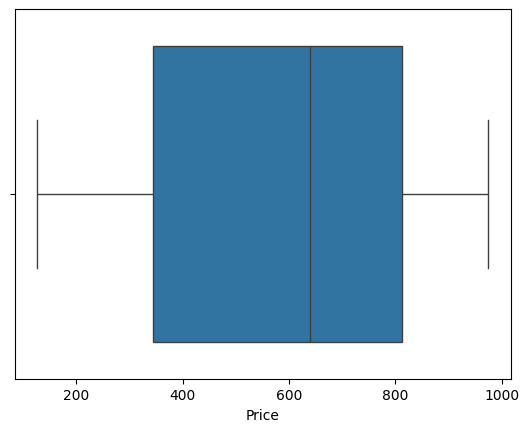

In [73]:
# CHECK FOR OUTLIERS
sns.boxplot(x=mainDF['Price'])

In [74]:
Q1 = mainDF["Price"].quantile(0.25)
Q3 = mainDF["Price"].quantile(0.75)
IQR = Q3 - Q1
outliers = mainDF[(mainDF["Price"] < Q1 - 1.5*IQR) | (mainDF["Price"] > Q3 + 1.5*IQR)]

print(f"Number of outliers in Price: {len(outliers)}")

Number of outliers in Price: 0


In [75]:
mainDF['price_z'] = zscore(mainDF['Price'])
mainDF[mainDF['price_z'].abs() > 3]

# returns 0 rows, no outliers

,Name of Painter,Subject of Painting,Style,Medium,Frame,Location,Price,Delivery,Shipment,Color Palette,...,Mood/Atmosphere,Theme/Lighting Requirements,Reproduction Type,Target Audience,Width,Height,Area,AspectRatio,LogPrice,price_z


## DATA VISUALIZATION

Text(0.5, 1.0, 'Price Distribution')

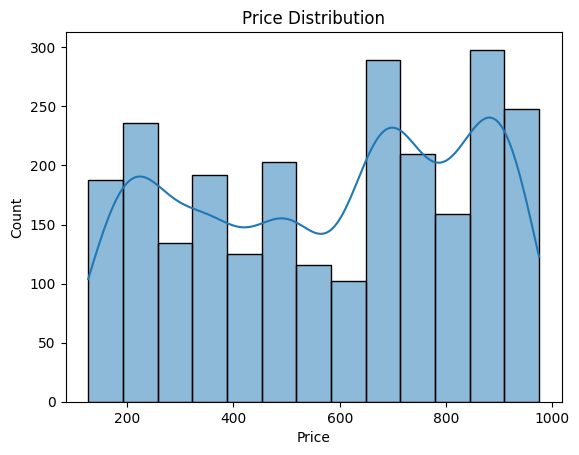

In [76]:
sns.histplot(mainDF['Price'], kde=True)
plt.title("Price Distribution")


Text(0.5, 1.0, 'Boxplot of Numeric Columns')

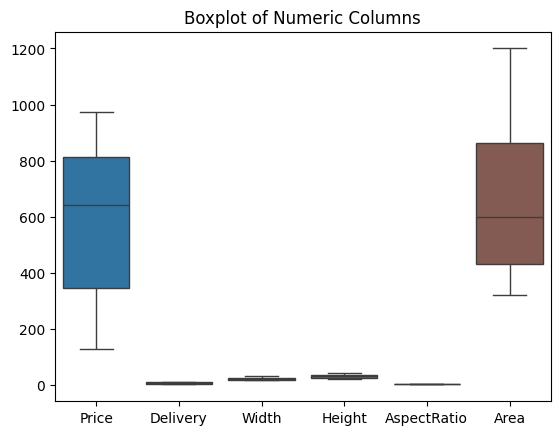

In [77]:
sns.boxplot(data=mainDF[['Price', 'Delivery', 'Width', 'Height', 'AspectRatio', 'Area']])
plt.title("Boxplot of Numeric Columns")


Text(0.5, 1.0, 'Counts by Style')

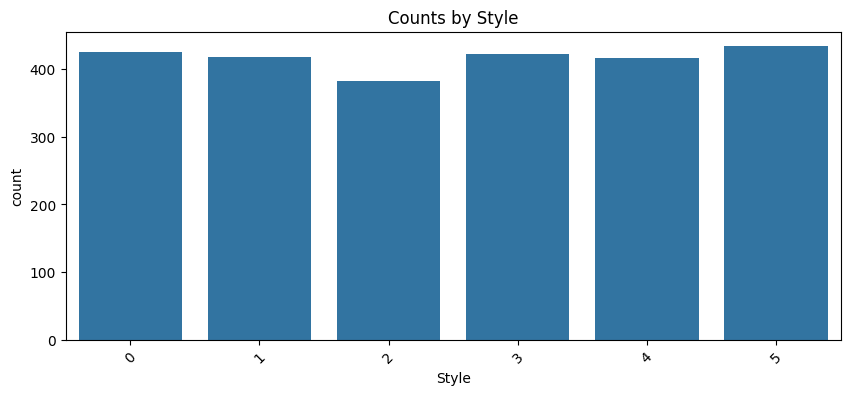

In [78]:
plt.figure(figsize=(10,4))
sns.countplot(data=mainDF, x='Style')
plt.xticks(rotation=45)
plt.title("Counts by Style")


Text(0.5, 1.0, 'Area vs Price')

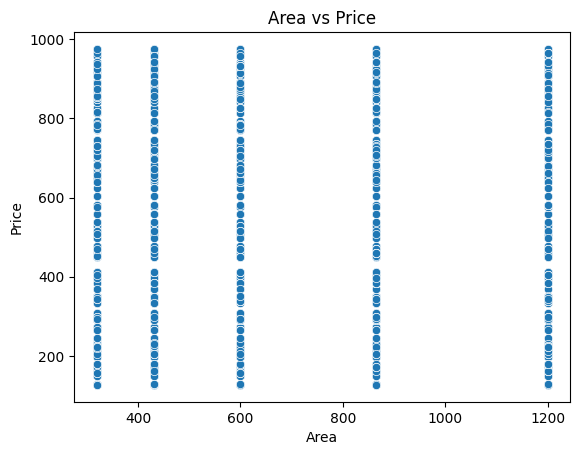

In [79]:
sns.scatterplot(x='Area', y='Price', data=mainDF)
plt.title("Area vs Price")


Text(0.5, 1.0, 'Price distribution across Styles')

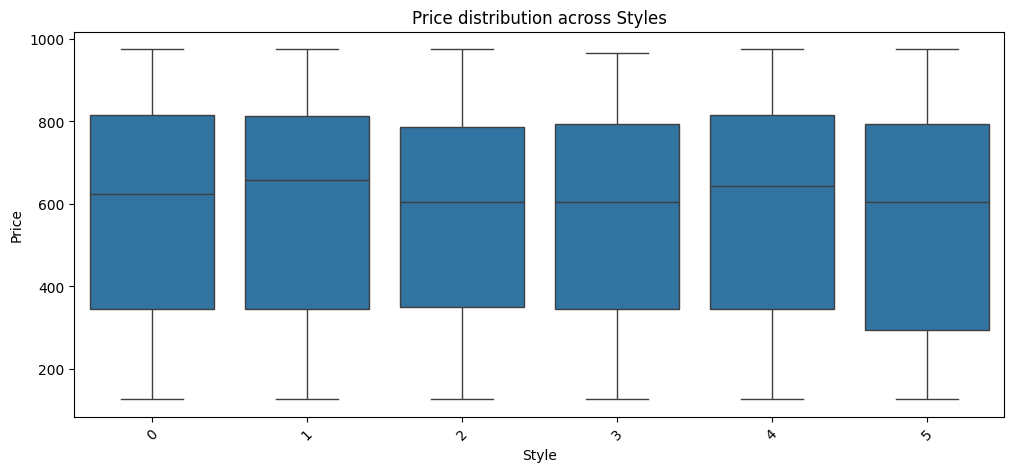

In [80]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Style', y='Price', data=mainDF)
plt.xticks(rotation=45)
plt.title("Price distribution across Styles")


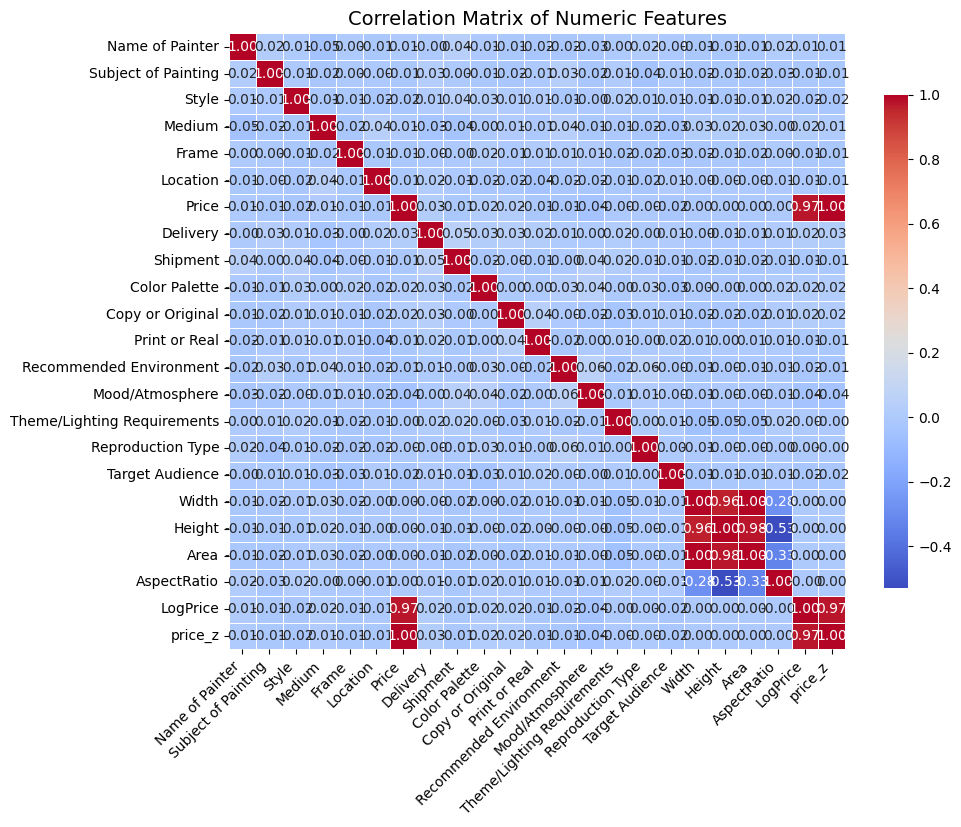

In [81]:
corr = mainDF.corr(numeric_only=True)

corr_target = corr["Price"].sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [82]:
print("Correlation with Target:")
print(corr_target)

Correlation with Target:
price_z                        1.000000
Price                          1.000000
LogPrice                       0.972157
Delivery                       0.025065
Color Palette                  0.019647
Copy or Original               0.015077
Medium                         0.012907
Name of Painter                0.008570
AspectRatio                    0.001325
Width                          0.000987
Area                           0.000535
Height                         0.000120
Reproduction Type             -0.001988
Theme/Lighting Requirements   -0.003634
Location                      -0.009430
Frame                         -0.010488
Subject of Painting           -0.011179
Print or Real                 -0.012311
Shipment                      -0.013608
Recommended Environment       -0.014894
Style                         -0.021803
Target Audience               -0.022892
Mood/Atmosphere               -0.041525
Name: Price, dtype: float64


Text(0.5, 1.0, 'Price Distribution (Skewed)')

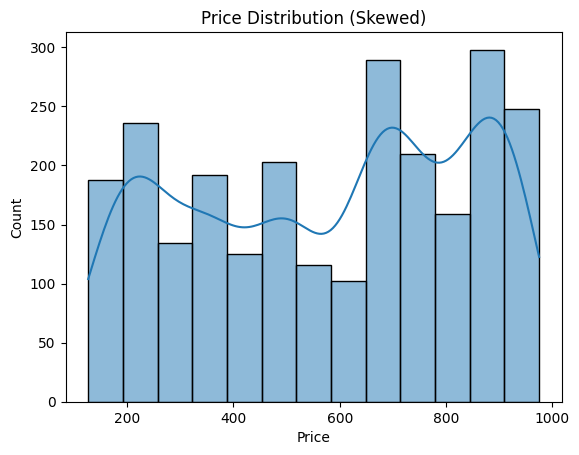

In [83]:
sns.histplot(mainDF['Price'], kde=True)
plt.title("Price Distribution (Skewed)")


Text(0.5, 1.0, 'Log-Price Distribution (Normalized)')

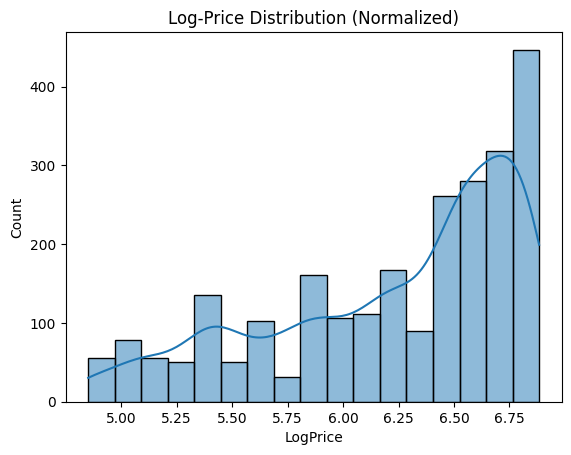

In [84]:
sns.histplot(mainDF['LogPrice'], kde=True)
plt.title("Log-Price Distribution (Normalized)")

## NEURAL NETWORK

In [85]:
target_col = "LogPrice"

X = mainDF.drop(columns=[target_col])
y = mainDF[target_col].values

numeric_cols = ["Delivery", "Width", "Height", "AspectRatio", "Area"]

# BEFORE train_test_split
y_price = mainDF["Price"].values
y_log   = np.log1p(y_price)

X_train_raw, X_test_raw, y_log_train, y_log_test, y_price_train, y_price_test = train_test_split(
    X, y_log, y_price, test_size=0.2, random_state=42
)

# split numeric vs categorical
cat_cols = [c for c in X.columns if c not in numeric_cols]

# one-hot encode categoricals
X_train_cat = pd.get_dummies(X_train_raw[cat_cols], drop_first=True)
X_test_cat  = pd.get_dummies(X_test_raw[cat_cols],  drop_first=True)

# align columns between train/test (important)
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

# scale numeric features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_raw[numeric_cols])
X_test_num  = scaler.transform(X_test_raw[numeric_cols])

# concat numeric + one-hot
X_train = np.hstack([X_train_num, X_train_cat.values])
X_test  = np.hstack([X_test_num,  X_test_cat.values])

input_dim = X_train.shape[1]

In [86]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train,
    y_log_train,
    test_size=0.2,
    random_state=42
)

X_train_t = torch.tensor(X_train_final, dtype=torch.float32)
y_train_t = torch.tensor(y_train_final, dtype=torch.float32).unsqueeze(1)

X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_log_test, dtype=torch.float32).unsqueeze(1)

# Build datasets
train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t, y_val_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

# Build dataloaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32)
test_loader  = DataLoader(test_ds, batch_size=32)



In [87]:
import torch.nn as nn

class PriceNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)   # regression output
        )

    def forward(self, x):
        return self.model(x)


model = PriceNet(input_dim)


In [88]:

model = PriceNet(input_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()


In [ ]:
train_losses = []
val_losses = []

epochs = 50

for epoch in range(epochs):
    model.train()
    train_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            val_loss += loss.item() * xb.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Epoch 1/50, Train Loss: 3.9612, Val Loss: 2.7633
Epoch 2/50, Train Loss: 1.7079, Val Loss: 0.9575
Epoch 3/50, Train Loss: 0.7747, Val Loss: 0.6905
Epoch 4/50, Train Loss: 0.6865, Val Loss: 0.6247
Epoch 5/50, Train Loss: 0.6696, Val Loss: 0.5920
Epoch 6/50, Train Loss: 0.6040, Val Loss: 0.6305
Epoch 7/50, Train Loss: 0.5277, Val Loss: 0.6422
Epoch 8/50, Train Loss: 0.5146, Val Loss: 0.4847
Epoch 9/50, Train Loss: 0.4474, Val Loss: 0.4599
Epoch 10/50, Train Loss: 0.4871, Val Loss: 0.4311
Epoch 11/50, Train Loss: 0.5045, Val Loss: 0.3947
Epoch 12/50, Train Loss: 0.4064, Val Loss: 0.4672
Epoch 13/50, Train Loss: 0.4110, Val Loss: 0.3722
Epoch 14/50, Train Loss: 0.3400, Val Loss: 0.5075
Epoch 15/50, Train Loss: 0.3542, Val Loss: 0.3139
Epoch 16/50, Train Loss: 0.2969, Val Loss: 0.2745
Epoch 17/50, Train Loss: 0.3004, Val Loss: 0.2524
Epoch 18/50, Train Loss: 0.2706, Val Loss: 0.2323
Epoch 19/50, Train Loss: 0.2369, Val Loss: 0.2199
Epoch 20/50, Train Loss: 0.2000, Val Loss: 0.1960
Epoch 21/

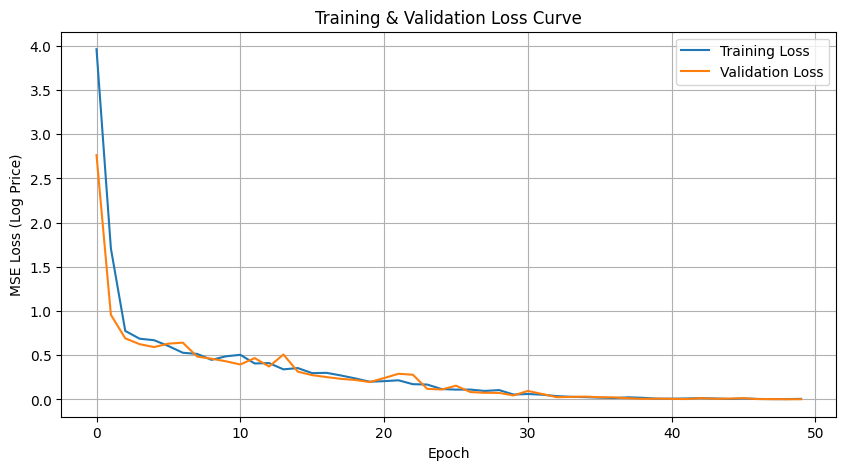

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (Log Price)")
plt.title("Training & Validation Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


In [91]:
# Evaluate on test set
model.eval()
with torch.no_grad():
    log_preds = model(X_test_t).squeeze(1).numpy()       # predicted LogPrice
    price_preds = np.expm1(log_preds)                    # convert to real Price

# true prices (not log)
true_prices = y_price_test   # you MUST have saved this before

mae = np.mean(np.abs(price_preds - true_prices))
rmse = np.sqrt(np.mean((price_preds - true_prices)**2))

print("MAE in real dollars:", mae)
print("RMSE in real dollars:", rmse)


MAE in real dollars: 17.741573883056642
RMSE in real dollars: 23.145395831107127


## EVALUATION 

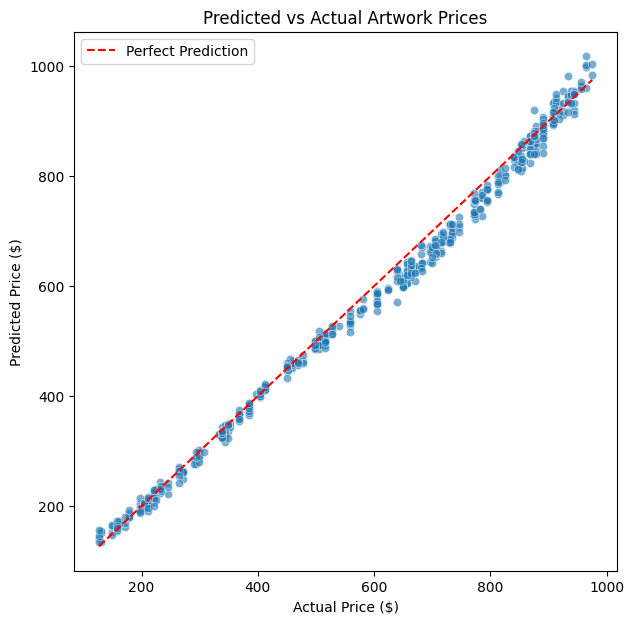

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(x=true_prices, y=price_preds, alpha=0.6)
plt.plot([true_prices.min(), true_prices.max()],
         [true_prices.min(), true_prices.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Predicted vs Actual Artwork Prices")
plt.legend()
plt.show()


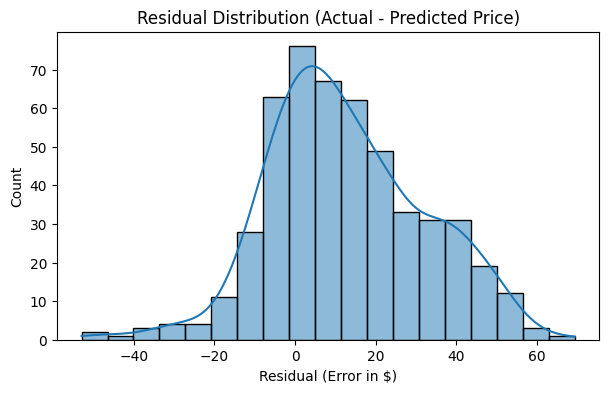

Mean residual: 12.764829132080077
Residuals should be centered around 0 for an unbiased model.


In [93]:
residuals = true_prices - price_preds

plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Actual - Predicted Price)")
plt.xlabel("Residual (Error in $)")
plt.show()

print("Mean residual:", residuals.mean())
print("Residuals should be centered around 0 for an unbiased model.")


### Residual Distribution Plot

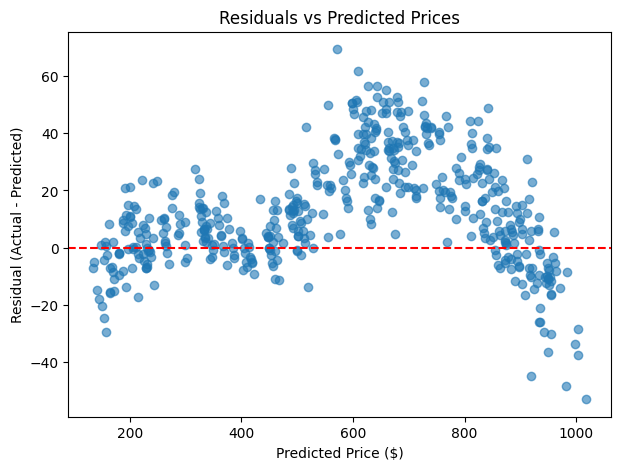

In [94]:
plt.figure(figsize=(7,5))
plt.scatter(price_preds, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Prices")
plt.show()


### Percentage Error Distribution

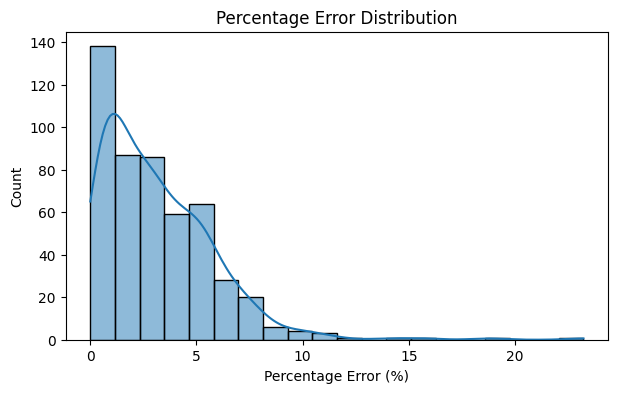

Mean % error: 3.168704669785764
Median % error: 2.6727001493638998


In [95]:
percent_error = (np.abs(residuals) / true_prices) * 100

plt.figure(figsize=(7,4))
sns.histplot(percent_error, bins=20, kde=True)
plt.title("Percentage Error Distribution")
plt.xlabel("Percentage Error (%)")
plt.show()

print("Mean % error:", percent_error.mean())
print("Median % error:", np.median(percent_error))


### QQ Plot 

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

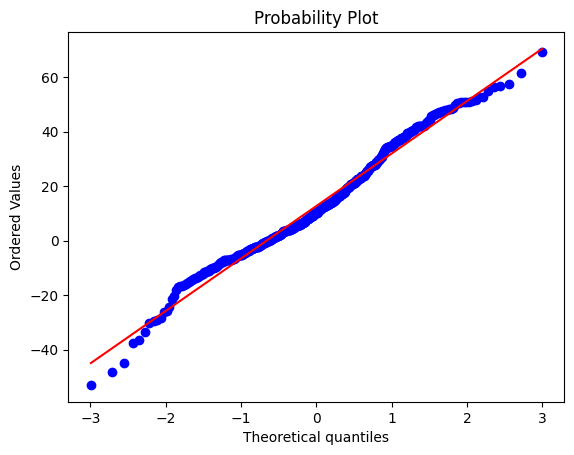

In [96]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)